In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

In [40]:
df = pd.read_csv('train.csv/train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [41]:
df.shape

(404290, 6)

In [42]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [43]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
122730,122730,198580,198581,I see her often examples of words to approach ...,Is it really economically plausible to keep Am...,0
182508,182508,279304,279305,How do students at Harvard spend their time?,How do MIT students spend their time?,1
29953,29953,55372,55373,What's the funniest movie you have ever seen?,What is the funniest movie you have ever watched?,1
385756,385756,517921,517922,Is there any story about drug addiction and al...,What is your story about drug addiction?,0
336188,336188,463521,463522,Where does Hans Zimmer get inspiration for com...,"Who is the better musician/composer, Thomas Ne...",0
171101,171101,227703,184237,What are the seven colours of the rainbow?,What is the sequence of colours in the rainbow?,1
127186,127186,204807,204808,What is it like to live in West Virginia?,What are some things foreigners believe about ...,0
358399,358399,323989,215501,What's the cutest thing you've ever seen a sna...,What is the cutest thing you've ever seen in y...,0
99413,99413,165043,165044,What is the best time to have sex for a baby?,What time of the day is best for sex?,0
256851,256851,372066,372067,Does Safi really help the skin?,Are sweets really bad for the skin?,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [45]:
df.isna().sum()   #missing values

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [46]:
df.duplicated().sum()  #duplicate rows

0

In [47]:
#distribution of duplicate and non duplicate questions

df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [48]:
(df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64

<AxesSubplot:>

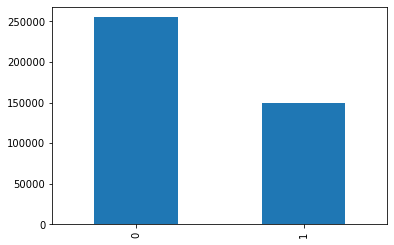

In [49]:
df['is_duplicate'].value_counts().plot(kind="bar")

In [50]:
#repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
qid

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64

In [51]:
len(qid)

808580

In [52]:
np.unique(qid).shape[0]

537933

In [53]:
x = qid.value_counts() >1
x[x].shape[0]

111780

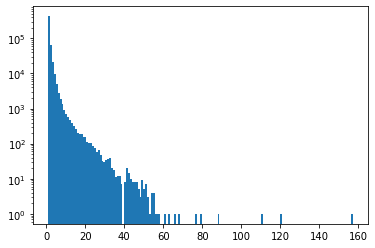

In [54]:
# repeated questions histogram

plt.hist(qid.value_counts().values, bins=160)
plt.yscale("log")
plt.show()

In [55]:
new_df = df.sample(50000)

In [56]:
new_df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [57]:
ques_df = new_df[['question1','question2']]
ques_df

,question1,question2
56339,Which is the song played in the advertisement ...,What is the Promotion Mix advertising?
198722,Where can I collect central bank cheque book?,What happens if you lose a bank draft cheque?
145018,India's huge population is a boon or bane?,Is population a boon or bane for India?
386586,Which is your favourite song?,Which one is your favourite song?
81383,Is there any way to travel faster than light s...,Is there any way to travel faster than light?
...,...,...
294073,What is the cost to create a hotel booking web...,How do I create a booking website?
336266,What are the best websites for learning C++?,Which is the best site to learn C/C++/algorithms?
290966,What is the difference between a headset and h...,How do I plug in a headphone cable in Procus O...
101805,"What are some examples of satire in ""The Great...",What are some examples of satire in The Great ...


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [60]:
cv = CountVectorizer(max_features=5000)

In [61]:
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [62]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis= 1)
temp_df.shape

(50000, 10000)

In [63]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [64]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,is_duplicate
56339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
386586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
81383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,:-1].values, temp_df.iloc[:,-1].values, test_size = 0.25, random_state=100)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

ModuleNotFoundError: No module named 'xgboost'

In [30]:
new_df[['question1','question2','is_duplicate']].iloc[4]

question1           Does playing chess improve logical thinking?
question2       How does playing chess improve logical thinking?
is_duplicate                                                   1
Name: 302568, dtype: object

In [31]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [32]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

C:\Users\Dell\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [33]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [34]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [35]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [36]:
new_df['word_common'] = new_df.apply(common_words, axis=1)


In [37]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [50]:
new_df['word_total'] = new_df.apply(total_words, axis=1)


In [51]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)


In [78]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
231143,231143,340876,340877,what is the peaceful and stressless job in it ...,can i rejoin it sector after quitting my bank job,0,52,49,10,10,3,20,0.15
270514,270514,388419,388420,how do porn stars prepare for anal sex,how do porn stars not get feces on their penis...,0,38,69,8,14,6,22,0.27
85404,85404,144202,38854,is our universe expanding,what are the proofs of scientists that the uni...,1,25,64,4,11,3,14,0.21
152954,152954,94471,240202,was the suicide squad movie good in your opinion,how is the movie suicide squad,1,48,31,9,7,4,16,0.25
111433,111433,182517,59130,how can i get free itunes gift cards,how can i get free itunes gift cards online,1,36,43,8,9,8,17,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376374,376374,507500,507501,can someone selected officers write a civil ...,what can india do for the world write an essay,0,168,47,34,11,7,36,0.19
135157,135157,215898,73511,is it possible to know who visited my facebook...,how i can know who visited my facebook profile,1,54,46,10,9,6,19,0.32
190317,190317,289362,267181,what are the average prostitution prices world...,what is an average salary,0,50,25,7,5,2,12,0.17
291600,291600,413049,176739,is happiness the goal of life,what is your ultimate aim in life,0,29,33,6,7,2,13,0.15


In [79]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [89]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df['question1'] = new_df['question1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
new_df['question2'] = new_df['question2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
231143,231143,340876,340877,peaceful stressless job sector,rejoin sector quitting bank job,0,52,49,10,10,3,20,0.15
270514,270514,388419,388420,porn stars prepare anal sex,porn stars get feces penises anal sex,0,38,69,8,14,6,22,0.27
85404,85404,144202,38854,universe expanding,proofs scientists universe expanding,1,25,64,4,11,3,14,0.21
152954,152954,94471,240202,suicide squad movie good opinion,movie suicide squad,1,48,31,9,7,4,16,0.25
111433,111433,182517,59130,get free itunes gift cards,get free itunes gift cards online,1,36,43,8,9,8,17,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376374,376374,507500,507501,someone selected officers write civil service ...,india world write essay,0,168,47,34,11,7,36,0.19
135157,135157,215898,73511,possible know visited facebook profile,know visited facebook profile,1,54,46,10,9,6,19,0.32
190317,190317,289362,267181,average prostitution prices worldwide,average salary,0,50,25,7,5,2,12,0.17
291600,291600,413049,176739,happiness goal life,ultimate aim life,0,29,33,6,7,2,13,0.15


In [91]:
from nltk.stem.porter import PorterStemmer as ps